# My Financial Analysis

7/3/2020  

This is my first attempt at ever doing any "financial analysis". This is a simple tool I am creating to understand historical trends of stock prices for companies I am interested in.
This is not meant to be a complete financial analysis, and is definitely NOT a tool I endorse to make recommendations on stocks. I am taking two of my recent found interests (Data science and investing), throwing them together, and see what happens! Voila!

*Disclaimer: I have not taken any Finance or Computer Science courses past the introductory classes at UT: FIN320F and CS350e


# Getting Data

You must first install pandas-datareader to use this code! Link to install [here](https://github.com/pydata/pandas-datareader). Pandas-Datareader allows you to pull stock information directly from the internet using different API's. Read more about it [here](https://pandas.pydata.org/pandas-docs/version/0.22.0/remote_data.html). 

You can install using (**pip install pandas-datareader**)

# Import Statements

In [28]:
# Import all the packages you need

from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import datetime

# Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()
%matplotlib inline

# Data Preparation

Note: This [documentation](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) tells you how to use pandas-datareader 

In [29]:
# I don't know why but the DataReader is not choosing the correct timeframe no matter what start/end datetimes I initialize here
start_datetime = datetime.datetime(2006,1,1)
end_datetime = datetime.datetime(2016,1,1)

In [30]:
# List the ticker symbols you are interested in (as strings) 
tickers = ["AAL", "SPY", "VOO", "JPM", "AMD", "JETS"]

In [36]:
# Concatenating dataframes for each ticker together to create a single dataframe called stocks
list_dfs = []
for ticker in tickers:
    list_dfs.append(data.DataReader(ticker, 'stooq', start_datetime, end_datetime))

stocks = pd.concat(list_dfs, axis=1, keys = tickers)

In [37]:
# Setting names for the multi-index 
stocks.columns.names = ['Ticker Symbol','Stock Info']

In [38]:
# What does the df look like
stocks.head()

Ticker Symbol    AAL                                       SPY          \
Stock Info      Open    High     Low  Close     Volume    Open    High   
Date                                                                     
2020-07-02     13.35  13.420  12.420  12.50   86439533  314.24  315.70   
2020-07-01     13.48  14.290  12.631  12.81  116661657  309.57  311.89   
2020-06-30     13.10  13.480  12.880  13.07   69607727  303.99  310.20   
2020-06-29     12.57  13.510  12.020  13.32  115051081  301.41  304.61   
2020-06-26     13.20  13.285  12.130  12.38  108813029  306.16  306.39   

Ticker Symbol                             ...      AMD                         \
Stock Info        Low   Close     Volume  ...     Open   High      Low  Close   
Date                                      ...                                   
2020-07-02     311.51  312.23   69344217  ...  53.0335  53.19  52.0508  52.34   
2020-07-01     309.07  310.52   72396542  ...  52.6300  52.87  51.6000  52.58   
2020-06-30     303.82  308.36  113394772  ...  51.1600  52.77  50.8200  52.61   
2020-06-29     298.93  304.46   79773260  ...  50.1500  50.28  48.4200  50.28   
2020-06-26     299.42  300.05  127961017  ...  51.8500  51.95  49.4500  50.10   

Ticker Symbol             JETS                                    
Stock Info       Volume   Open     High      Low  Close   Volume  
Date                                                              
2020-07-02     29081425  17.00  17.0950  16.5500  16.59  3068486  
2020-07-01     32370945  16.98  17.3500  16.4300  16.52  3782455  
2020-06-30     42275739  16.69  16.8249  16.3564  16.65  2472513  
2020-06-29     49905813  16.17  16.8935  15.8902  16.83  4829417  
2020-06-26     65485729  16.51  16.5400  15.7700  16.02  4264956  

[5 rows x 30 columns]

In [39]:
# start date 
stocks.index[-1]

Timestamp('2015-07-06 00:00:00')

In [40]:
# end date
stocks.index[0]

Timestamp('2020-07-02 00:00:00')

# Returns Analysis

In [11]:
# Looking at the closing prices for each stock
stocks.xs(key='Close',axis=1, level=1).head()

Ticker Symbol,AAL,SPY,VOO,JPM,AMD,JETS
Date,,,,,,
2020-07-02,12.50,312.23,286.81,92.66,52.34,16.59
2020-07-01,12.81,310.52,285.37,93.26,52.58,16.52
2020-06-30,13.07,308.36,283.43,94.06,52.61,16.65
2020-06-29,13.32,304.46,279.70,93.00,50.28,16.83
2020-06-26,12.38,300.05,275.68,92.59,50.10,16.02


Creating a new df called returns that calculates the return after each day. Returns are typically defined by:

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [12]:
returns = pd.DataFrame()

In [42]:
# We can use pandas pct_change() method on the Close column to create a column representing this return value. 

In [43]:
for ticker in tickers:
    returns[ticker]=stocks.xs(key=(ticker,'Close'), axis=1).pct_change()

In [44]:
returns.head()

,AAL,SPY,VOO,JPM,AMD,JETS
Date,,,,,,
2020-07-02,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-01,0.024800,-0.005477,-0.005021,0.006475,0.004585,-0.004219
2020-06-30,0.020297,-0.006956,-0.006798,0.008578,0.000571,0.007869
2020-06-29,0.019128,-0.012648,-0.013160,-0.011269,-0.044288,0.010811
2020-06-26,-0.070571,-0.014485,-0.014373,-0.004409,-0.003580,-0.048128


# Best and Worst Single Day Returns

In [45]:
# Date of worst single day returns.
returns.idxmin()

AAL    2020-06-03
SPY    2020-03-23
VOO    2020-03-23
JPM    2020-03-12
AMD    2016-04-21
JETS   2020-03-23
dtype: datetime64[ns]

In [46]:
# Date of worst single day returns.
returns.idxmax()

AAL    2020-03-17
SPY    2020-03-13
VOO    2020-03-13
JPM    2020-03-13
AMD    2017-05-01
JETS   2020-03-17
dtype: datetime64[ns]

# Std of returns to understand riskiness of each stock

In [47]:
# By look at the standard deviation of all the returns, we can see which stocks are more volatile
returns.std()

AAL     0.033127
SPY     0.012133
VOO     0.012364
JPM     0.018793
AMD     0.040171
JETS    0.021843
dtype: float64

In [48]:
# Looking at the standard deviation over YTD 2020 just to see effect of coronavirus
returns.loc['2020-07-03':'2020-01-01'].std()

AAL     0.079858
SPY     0.028512
VOO     0.029465
JPM     0.043901
AMD     0.042582
JETS    0.055994
dtype: float64

In [49]:
# as compared to the same time period in 2019
returns.loc['2019-07-03':'2019-01-01'].std()

AAL     0.022942
SPY     0.007901
VOO     0.007826
JPM     0.011518
AMD     0.036933
JETS    0.011975
dtype: float64

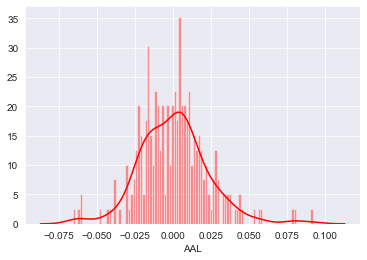

In [51]:
# We can show the distributions of the daily returns using Seaborn's distplot
a = returns["AAL"].loc['2019-12-30':'2019-01-01'].dropna()
a
plot = sns.distplot(a, bins=100, color='red')
# plot.set_xlim([-0.05, 0.05])

# Visualizations over time

In [24]:
# Using plotly to plot all the stocks over time. This graph shows daily closing prices 
stocks.xs(key='Close',axis=1,level=1).iplot()

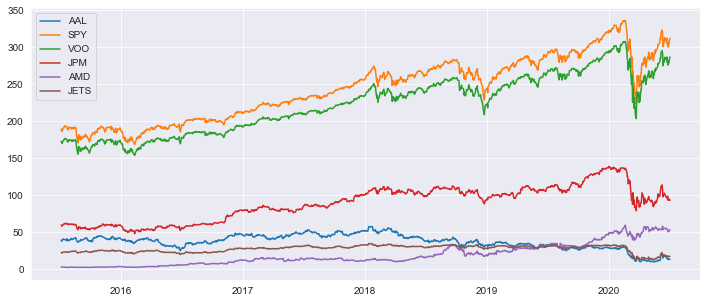

In [52]:
# Using matplotlib (in case Plotly stops working above) to plot all the stocks over time. This graph shows daily closing prices 
fig = plt.figure(figsize=(12,5))
for ticker in tickers:
    plt.plot(stocks[ticker]["Close"])
    plt.legend(tickers)

# Moving Averages

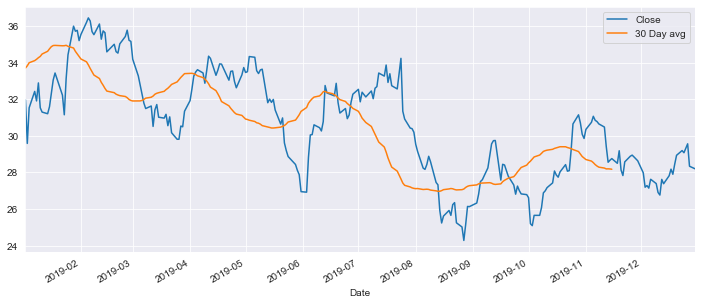

In [53]:
# Using moving averages, I can filter out some of the noise and focus on trends in the stocks
plt.figure(figsize=(12,5))
stocks["AAL"]["Close"].loc['2019-12-30':'2019-01-01'].plot(label="Close")
stocks["AAL"]["Close"].loc['2019-12-30':'2019-01-01'].rolling(window=30).mean().plot(label="30 Day avg")
plt.legend()

# Technical Analysis Plots

Using the Cufflinks library to create some Technical Analysis plots.

Use .iplot(kind='candle) to create a [candlestick chart](https://en.wikipedia.org/wiki/Candlestick_chart). Candlestick charts are a commonly used financial chart to show price movements in stocks

In [69]:
list_dfs[0][['Open', 'High', 'Low', 'Close']].loc['2019-01-01':'2018-01-01'].iplot(kind='candle',title="Candlestick")


Use .ta_plot(study='sma') to create a Simple Moving Averages plot

In [55]:
list_dfs[0]['Close'].loc['2019-01-01':'2018-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

Use .ta_plot(study='boll') to create a Bollinger Band Plot 

In [56]:
list_dfs[0]['Close'].loc['2019-01-01':'2018-01-01'].ta_plot(study='boll')